Join the data from Part 1 with the data from Part 2 to create a new dataframe.

In [3]:
import pandas as pd
import numpy as np

In [53]:
# getting the joined data
df_city_bikes = pd.read_csv('city_bikes_df.csv')

In [47]:
# view columns
city_bike_share.columns

Index(['Unnamed: 0', 'id', 'name', 'latitude', 'longitude', 'timestamp',
       'free_bikes', 'empty_slots', 'extra.uid', 'extra.renting',
       'extra.returning', 'extra.last_updated', 'extra.slots',
       'extra.normal_bikes', 'extra.ebikes', 'extra.has_ebikes'],
      dtype='object')

In [36]:
city_bike_share_columns = pd.read_csv('city_bike_column_dropped.csv')

In [37]:
city_bike_share_columns.columns

Index(['Unnamed: 0.1', 'fsq_id', 'categories', 'chains', 'closed_bucket',
       'distance', 'link', 'name_x', 'timezone', 'geocodes.main.latitude',
       'geocodes.main.longitude', 'geocodes.roof.latitude',
       'geocodes.roof.longitude', 'location.address', 'location.country',
       'location.cross_street', 'location.formatted_address',
       'location.locality', 'location.postcode', 'location.region',
       'related_places.parent.fsq_id', 'related_places.parent.categories',
       'related_places.parent.name', 'geocodes.drop_off.latitude',
       'geocodes.drop_off.longitude', 'related_places.children',
       'location.address_extended', 'bike_station_index', 'location.po_box',
       'geocodes.front_door.latitude', 'geocodes.front_door.longitude',
       'Unnamed: 0', 'id', 'name_y', 'latitude', 'longitude', 'timestamp',
       'free_bikes', 'empty_slots', 'extra.uid', 'extra.renting',
       'extra.returning', 'extra.last_updated', 'extra.slots',
       'extra.normal_bikes'

In [ ]:
df_dropped_columns = city_bike_share_columns.drop(['extra.uid', 'extra.renting',
       'extra.returning', 'extra.last_updated', 'extra.slots',
       'extra.normal_bikes', 'extra.ebikes', 'extra.has_ebikes'], axis=1)

In [ ]:
df_dropped_columns.columns

Index(['Unnamed: 0.1', 'fsq_id', 'categories', 'chains', 'closed_bucket',
       'distance', 'link', 'name_x', 'timezone', 'geocodes.main.latitude',
       'geocodes.main.longitude', 'geocodes.roof.latitude',
       'geocodes.roof.longitude', 'location.address', 'location.country',
       'location.cross_street', 'location.formatted_address',
       'location.locality', 'location.postcode', 'location.region',
       'related_places.parent.fsq_id', 'related_places.parent.categories',
       'related_places.parent.name', 'geocodes.drop_off.latitude',
       'geocodes.drop_off.longitude', 'related_places.children',
       'location.address_extended', 'bike_station_index', 'location.po_box',
       'geocodes.front_door.latitude', 'geocodes.front_door.longitude',
       'Unnamed: 0', 'id', 'name_y', 'latitude', 'longitude', 'timestamp',
       'free_bikes', 'empty_slots'],
      dtype='object')

In [ ]:
df_dropped_columns['categories'].value_counts()

categories
[{'id': 18021, 'name': 'Gym and Studio', 'short_name': 'Gym and Studio', 'plural_name': 'Gym and Studios', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/building/gym_', 'suffix': '.png'}}]                                                                                                                                                                                                                                                                                                                                                                                                                                                           2239
[{'id': 16032, 'name': 'Park', 'short_name': 'Park', 'plural_name': 'Parks', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/parks_outdoors/park_', 'suffix': '.png'}}]                                                                                                                                                                  

In [ ]:
df_dropped_columns['name_y'].value_counts() # note that name_y is the stations. This is going to be renamed to stations for a clearer understanding.count
df_dropped_columns['stations'] = df_dropped_columns['name_y']

In [ ]:
df_dropped_columns[['stations']].value_counts()

stations                              
10th & Cambie                             50
Cypress & 10th                            50
10th & Columbia                           50
Dunbar & Broadway                         50
Dunsmuir & Beatty                         50
                                          ..
Brock Commons                             20
Trimble & 8th                             19
Sasamat & 10th                            16
Arbutus & Nanton                          14
Stanley Park - Third Beach Parking Lot     6
Name: count, Length: 258, dtype: int64

In [ ]:
df_dropped_columns[['name_x']].value_counts()

name_x                         
Fitness World                      120
Caffe Barney                        50
Orangetheory Fitness                50
Robert Lee YMCA Pool                49
Creekside Park                      49
                                  ... 
IDance Studios                       1
Stella Gym                           1
Unity Integration Studios            1
Devine Fitness & Pilates             1
kerrisdale cyclone Taylor arena      1
Name: count, Length: 960, dtype: int64

In [ ]:
df_dropped_columns[['fsq_id']].value_counts()

fsq_id                  
5806abc3d67c62c5c465643d    49
5501d248498ec8482e74c7f4    48
4d2d106da40da35d3af78e77    47
51f58381498ea9240bf344ce    46
4d114e17437c236a5d6c8e7d    45
                            ..
4bc18891920eb71349ef1a2c     1
948d7cf7b1a140a63b4eee52     1
93f88e578e55429cba8ac936     1
542dd7c3498ef8a716fff6d9     1
ff1254690f7e47b98456aa08     1
Name: count, Length: 1013, dtype: int64

In [ ]:
df_dropped_columns_sorted = df_dropped_columns.sort_values('categories')

In [ ]:
#sb.scatterplot(x=df_results_all['geocodes.main.longitude'],y=df_results_all['geocodes.main.latitude'],c='b')

In [ ]:
# Convert string representation of lists into actual lists
import ast
df_dropped_columns_sorted['categories'] = df_dropped_columns_sorted['categories'].apply(ast.literal_eval)

In [ ]:
# Extract category names
df_dropped_columns_sorted['category_names'] = df_dropped_columns_sorted['categories'].apply(lambda x: [d['name'] for d in x])

In [ ]:
# view the first 5 rows
#df_dropped_columns_sorted.head()

In [ ]:
df_dropped_columns_sorted['cat_names'] = [','.join(map(str, l)) for l in df_dropped_columns_sorted['category_names']]

In [ ]:
# df_dropped_columns_sorted.isnull().sum()

Unnamed: 0.1                            0
fsq_id                                  0
categories                              0
chains                                  0
closed_bucket                           0
distance                                0
link                                    0
name_x                                  0
timezone                             1448
geocodes.main.latitude                  0
geocodes.main.longitude                 0
geocodes.roof.latitude               1122
geocodes.roof.longitude              1122
location.address                     1090
location.country                        0
location.cross_street                7130
location.formatted_address            304
location.locality                     385
location.postcode                    2861
location.region                       304
related_places.parent.fsq_id        11047
related_places.parent.categories    11047
related_places.parent.name          11047
geocodes.drop_off.latitude        

In [38]:
# read the saved API data
data = pd.read_csv('final_data.csv')

In [39]:
data.head()

,Unnamed: 0.2,Unnamed: 0.1,fsq_id,categories,chains,closed_bucket,distance,link,name_x,timezone,...,name_y,latitude,longitude,timestamp,free_bikes,empty_slots,stations,category_names,cat_names,category_group
0,11501,11501,a1bc6053934e4395a5b80379,"[{'id': 10000, 'name': 'Arts and Entertainment...",[],LikelyOpen,836,/v3/places/a1bc6053934e4395a5b80379,First Dance Vancouver,NaN,...,8th & Prince Edward,49.263518,-123.095680,2025-02-08T08:10:50.530814Z,8,10,8th & Prince Edward,"['Arts and Entertainment', 'Dance Studio']","Arts and Entertainment,Dance Studio",unknown
1,10654,10654,13723319ace94aa3d0ed4bc9,"[{'id': 10000, 'name': 'Arts and Entertainment...",[],Unsure,850,/v3/places/13723319ace94aa3d0ed4bc9,Salsa & Tango Dance Susana Domingues,NaN,...,18th & Cambie,49.254818,-123.114785,2025-02-08T08:10:50.556346Z,6,18,18th & Cambie,"['Arts and Entertainment', 'Dance Studio']","Arts and Entertainment,Dance Studio",unknown
2,494,494,13723319ace94aa3d0ed4bc9,"[{'id': 10000, 'name': 'Arts and Entertainment...",[],Unsure,450,/v3/places/13723319ace94aa3d0ed4bc9,Salsa & Tango Dance Susana Domingues,NaN,...,13th & Cambie,49.259579,-123.114769,2025-02-08T08:10:50.532118Z,5,9,13th & Cambie,"['Arts and Entertainment', 'Dance Studio']","Arts and Entertainment,Dance Studio",unknown
3,6935,6935,4d2621522f77a09011c60cf1,"[{'id': 10000, 'name': 'Arts and Entertainment...",[],LikelyOpen,859,/v3/places/4d2621522f77a09011c60cf1,Night and Day Dance,America/Vancouver,...,Princess & Union,49.277615,-123.091654,2025-02-08T08:10:50.528136Z,8,4,Princess & Union,"['Arts and Entertainment', 'Dance Studio']","Arts and Entertainment,Dance Studio",unknown
4,6848,6848,13723319ace94aa3d0ed4bc9,"[{'id': 10000, 'name': 'Arts and Entertainment...",[],Unsure,863,/v3/places/13723319ace94aa3d0ed4bc9,Salsa & Tango Dance Susana Domingues,NaN,...,Charleson Park,49.267628,-123.127698,2025-02-08T08:10:50.299604Z,10,4,Charleson Park,"['Arts and Entertainment', 'Dance Studio']","Arts and Entertainment,Dance Studio",unknown


## Group and Join Data

In [41]:
# group by stations with min distance
data.groupby('bike_station_index',as_index=False)['distance'].min()

,bike_station_index,distance
0,0,172
1,1,82
2,2,90
3,3,46
4,4,216
...,...,...
253,253,171
254,254,108
255,255,119
256,256,106


In [50]:
# group with count of fsq_id
data.groupby('bike_station_index',as_index=False)['fsq_id'].count()


,bike_station_index,fsq_id
0,0,50
1,1,45
2,2,50
3,3,47
4,4,48
...,...,...
253,253,47
254,254,46
255,255,50
256,256,50


In [ ]:
#df_grouped = data.groupby(['bike_station_index', 'category_group'], as_index=True).agg({'distance': 'min', 'fsq_id': 'count'})
#df_grouped

In [51]:
# combined groupby
df_grouped = data.groupby('bike_station_index', as_index=True).agg({'distance': 'min', 'fsq_id': 'count'})

In [54]:
# join the data 
df_merged = pd.merge(df_grouped,df_city_bikes,left_on='bike_station_index',right_on=df_city_bikes.index)
df_merged

,bike_station_index,distance,fsq_id,Unnamed: 0,id,name,latitude,longitude,timestamp,free_bikes,empty_slots,extra.uid,extra.renting,extra.returning,extra.last_updated,extra.slots,extra.normal_bikes,extra.ebikes,extra.has_ebikes
0,0,172,50,0,00fa94ad698dc4a9e4d708d6fd32f294,Chilco & Barclay,49.291909,-123.140713,2025-02-08T08:10:50.124152Z,17,0,92,True,True,1739002136,18,15,2,True
1,1,82,45,1,012d3e06901cc222b1c2cf0a2ace3a29,St George & Broadway,49.262321,-123.093060,2025-02-08T08:10:50.529626Z,6,8,248,True,True,1739002022,14,5,1,True
2,2,90,50,2,029a505bd4422a1afd127987757f71a6,Britannia Parking Lot,49.275882,-123.071865,2025-02-08T08:10:50.528937Z,2,12,232,True,True,1739001589,14,2,0,True
3,3,46,47,3,0438114d2e6b96118de69bc9775bb21e,Morton & Denman,49.288030,-123.142135,2025-02-08T08:10:50.093341Z,12,14,31,True,True,1739001853,26,6,6,True
4,4,216,48,4,0459b7e93703980b853cd65a9dc60596,Thornton & National,49.273777,-123.092723,2025-02-08T08:10:50.528973Z,4,10,233,True,True,1739001524,14,4,0,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
253,253,171,47,253,fbb4c06b719596c21f91fd51ef6d4710,7th & Heather,49.265089,-123.119425,2025-02-08T08:10:50.123858Z,12,6,81,True,True,1739002135,18,11,1,True
254,254,108,46,254,fe0c57d04d6e682d284d501446095fc9,Union & Dunlevy,49.277595,-123.095830,2025-02-08T08:10:50.528015Z,5,11,212,True,True,1739002135,16,5,0,True
255,255,119,50,255,fedff7a263c182df94bda7307059cc52,Richards & Helmcken,49.277141,-123.122589,2025-02-08T08:10:50.299192Z,0,18,138,True,True,1739001816,18,0,0,True
256,256,106,50,256,fef69fb400210d861107a61db954d037,Keefer & Abbott,49.279821,-123.108020,2025-02-08T08:10:50.122810Z,15,13,53,True,True,1739001000,28,15,0,True


Provide a visualization that you used as part of your EDA process. Explain the initial pattern or relationship you discoved through this visualization. 

In [92]:
import pandas as pd
import numpy as np
import seaborn as sns                       #visualisation
import matplotlib.pyplot as plt             #visualisation
import plotly.graph_objs as go
sns.set_theme()
%matplotlib inline     
sns.set(color_codes=True)

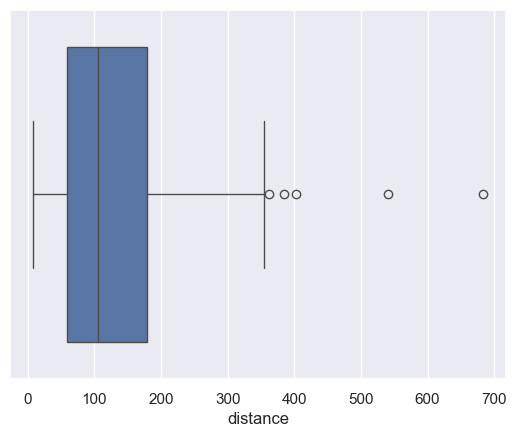

In [93]:
# Detecting Outliers
sns.boxplot(x=df_merged['distance'])
plt.show()

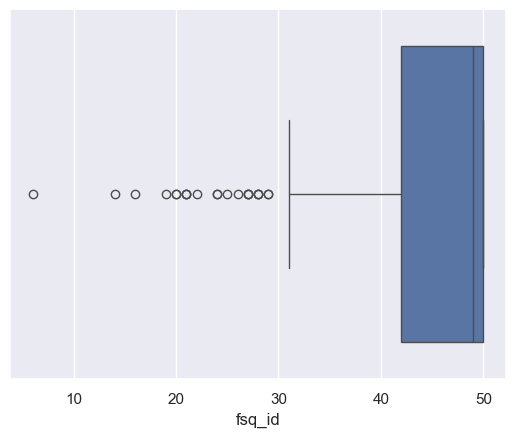

In [94]:
# Detecting Outliers
sns.boxplot(x=df_merged['fsq_id'])
plt.show()

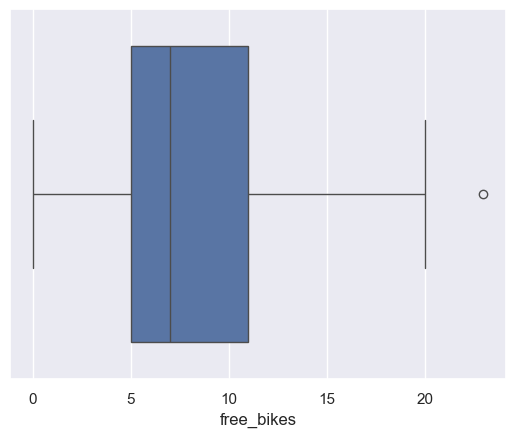

In [96]:
sns.boxplot(x=df_merged['free_bikes'])
plt.show()

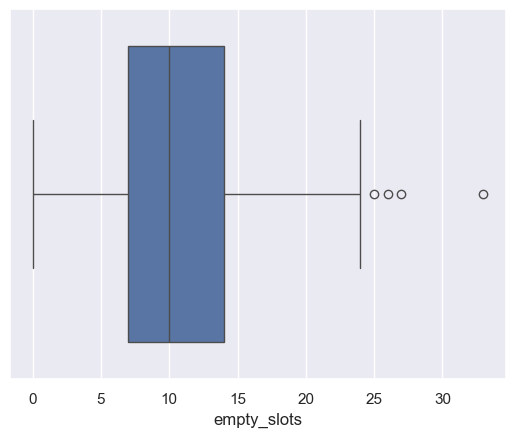

In [98]:
sns.boxplot(x=df_merged['empty_slots'])
plt.show()

In [ ]:
# calculating quantile
# Q1 = df_merged_dropped_columns.quantile(0.25, numeric_only=True)
# Q3 = df_merged_dropped_columns.quantile(0.75, numeric_only=True)
# IQR = Q3 - Q1
# print(IQR)

## Scatter Diagram, Heat Maps and Histogram

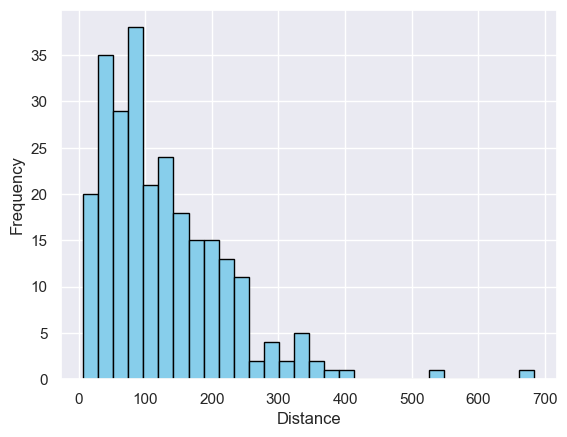

In [99]:
# Plot different features against one another (scatter), against frequency (histogram)
# Histogram

# Plotting a basic histogram
plt.hist(df_merged['distance'], bins=30, color='skyblue', edgecolor='black')
 
# Adding labels and title
plt.xlabel('Distance')
plt.ylabel('Frequency')
 
# Display the plot
plt.show()

This is skewed

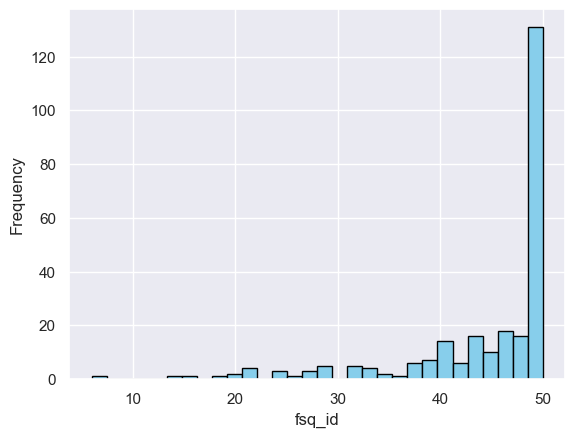

In [100]:
# Plot different features against one another (scatter), against frequency (histogram)
# Histogram

# Plotting a basic histogram
plt.hist(df_merged['fsq_id'], bins=30, color='skyblue', edgecolor='black')
 
# Adding labels and title
plt.xlabel('fsq_id')
plt.ylabel('Frequency')
 
# Display the plot
plt.show()

this is also skewed and we can detect an outlier

In [102]:
#dropping irrelevant columns
df_merged_dropped_columns = df_merged.drop(['extra.uid', 'extra.renting',
       'extra.returning', 'extra.last_updated', 'extra.slots',
       'extra.normal_bikes', 'extra.ebikes', 'extra.has_ebikes', 'Unnamed: 0', 'timestamp'], axis=1)

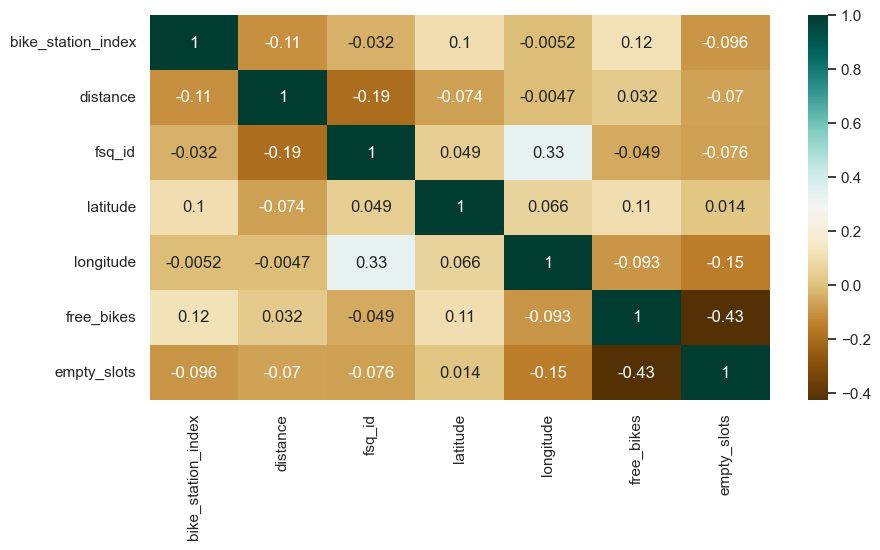

In [103]:
# Heat Maps
plt.figure(figsize=(10,5))
c= df_merged_dropped_columns.corr(numeric_only=True)
sns.heatmap(c,cmap="BrBG",annot=True)
c
plt.show()

The heat maps above shows low correlation between the variables (features)

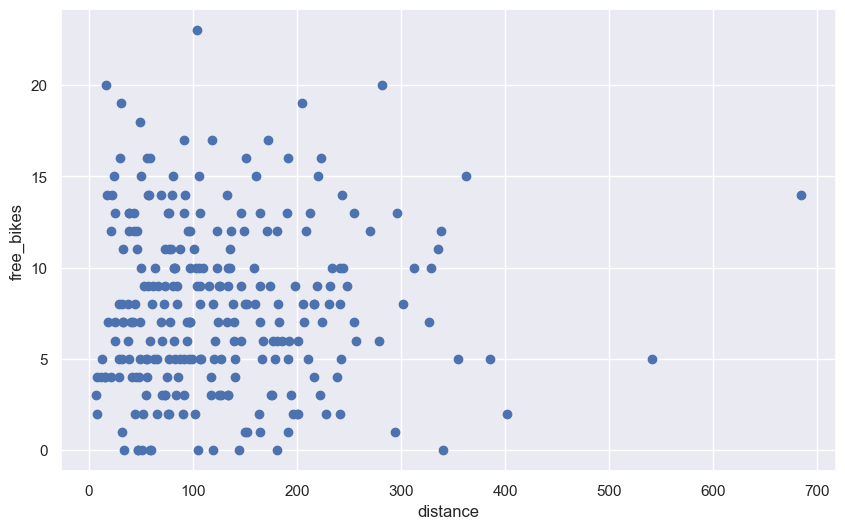

In [ ]:
#Scatterplot
fig, ax = plt.subplots(figsize=(10,6))
ax.scatter(df_merged_dropped_columns['distance'], df_merged_dropped_columns['free_bikes'])
ax.set_xlabel('distance')
ax.set_ylabel('free_bikes')
plt.show()

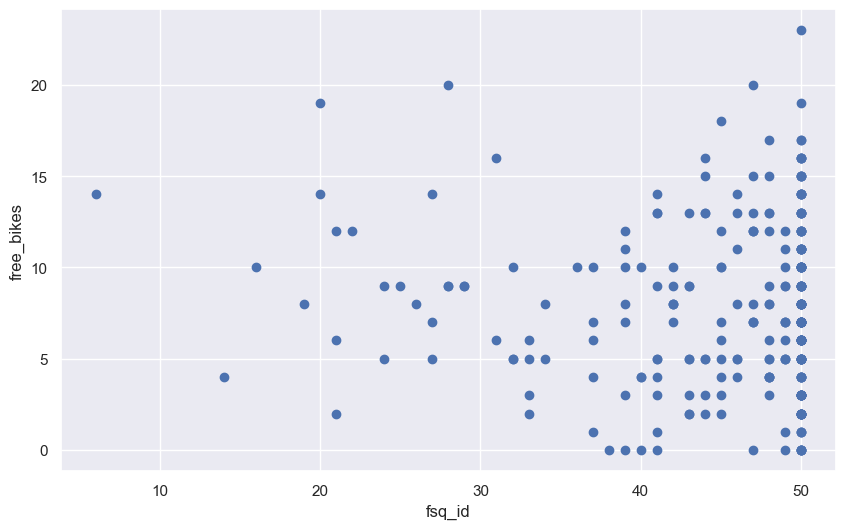

In [ ]:
#Scatterplot
fig, ax = plt.subplots(figsize=(10,6))
ax.scatter(df_merged_dropped_columns['fsq_id'], df_merged_dropped_columns['free_bikes'])
ax.set_xlabel('fsq_id')
ax.set_ylabel('free_bikes')
plt.show()

# Database

Put all your results in an SQLite3 database (remember, SQLite stores its databases as files in your local machine - make sure to create your database in your project's data/ directory!)

In [2]:
import sqlite3
from sqlite3 import Error

def create_connection(path):
    connection = None
    try:
        connection = sqlite3.connect(path)
        print("Connection to SQLite DB successful")
    except Error as e:
        print(f"The error '{e}' occurred")

    return connection

Look at the data before and after the join to validate your data.

In [7]:
connection = create_connection("sm_app.sqlite")

Connection to SQLite DB successful


## Creatibg Table

In [15]:
def execute_query(connection, query):
    cursor = connection.cursor()
    try:
        cursor.execute(query)
        connection.commit()
        print("Query executed successfully")
    except Error as e:
        print(f"The error '{e}' occurred")

In [27]:
create_stations_table = """
CREATE TABLE IF NOT EXISTS stations (
  bike_station_index INTEGER PRIMARY KEY,
  fsq_id INTEGER,
  name TEXT,
  free_bikes INTEGER,
  empty_slots INTEGER
);
"""


In [25]:
create_geodistance_table = """
CREATE TABLE IF NOT EXISTS geo_distance (
  id INTEGER PRIMARY KEY AUTOINCREMENT,
  bike_station_index INTEGER,
  latitude INTEGER,
  longitude INTEGER,
  FOREIGN KEY (bike_station_index) REFERENCES stations (bike_station_index)
  );
"""


In [28]:
execute_query(connection, create_stations_table)

Query executed successfully


In [26]:
execute_query(connection, create_geodistance_table)

Query executed successfully


## Inserting values

In [75]:
# Define cursor
cursor = connection.cursor()

In [ ]:
# insert values for stations
for _, row in df_merged.iterrows():
    cursor.execute('''
    INSERT INTO stations (bike_station_index, fsq_id, name, free_bikes, empty_slots)
    VALUES (?, ?, ?, ?, ?);
    ''', (row['bike_station_index'], row['fsq_id'], row['name'], row['free_bikes'], row['empty_slots']))

In [ ]:
# insert for geo+distance
for _, row in df_merged.iterrows():
    cursor.execute('''
    INSERT INTO geo_distance (bike_station_index, latitude, longitude)
    VALUES (?, ?, ?);
    ''', (row['bike_station_index'], row['latitude'], row['longitude']))

In [86]:
conn.commit()


In [87]:
# define select from function
def execute_read_query(connection, query):
    cursor = connection.cursor()
    result = None
    try:
        cursor.execute(query)
        result = cursor.fetchall()
        return result
    except Error as e:
        print(f"The error '{e}' occurred")

In [90]:
# select columns
select_geodistance = "SELECT * from geo_distance"
geo_distance = execute_read_query(connection, select_geodistance)

for i in geo_distance:
    print(i)

(0, None, 49.291909, -123.140713)
(1, None, 49.262321, -123.09306)
(2, None, 49.275882, -123.071865)
(3, None, 49.28803, -123.142135)
(4, None, 49.273777, -123.092723)
(5, None, 49.259469, -123.145718)
(6, None, 49.266314, -123.116011)
(7, None, 49.264928, -123.168068)
(8, None, 49.243375, -123.104978)
(9, None, 49.283968, -123.061615)
(10, None, 49.259579, -123.114769)
(11, None, 49.247854, -123.153422)
(12, None, 49.257939, -123.089531)
(13, None, 49.256857, -123.065646)
(14, None, 49.282758, -123.122092)
(15, None, 49.289255, -123.132677)
(16, None, 49.2685027, -123.0975014)
(17, None, 49.26151, -123.089413)
(18, None, 49.266724, -123.104824)
(19, None, 49.256845, -123.120071)
(20, None, 49.279259, -123.119145)
(21, None, 49.277773, -123.114237)
(22, None, 49.283482, -123.103738)
(23, None, 49.25094, -123.101306)
(24, None, 49.276294, -123.106534)
(25, None, 49.2731, -123.0732)
(26, None, 49.27023, -123.10651)
(27, None, 49.264466, -123.085183)
(28, None, 49.283986, -123.065264)
(29

In [91]:
# select columns
select_stations = "SELECT * from stations"
stations = execute_read_query(connection, select_stations)

for i in stations:
    print(i)

(0, 50, 'Chilco & Barclay', 17, 0, None, None)
(1, 45, 'St George & Broadway', 6, 8, None, None)
(2, 50, 'Britannia Parking Lot', 2, 12, None, None)
(3, 47, 'Morton & Denman', 12, 14, None, None)
(4, 48, 'Thornton & National', 4, 10, None, None)
(5, 50, 'Burrard & 14th', 1, 17, None, None)
(6, 50, 'Olympic Village Station', 3, 17, None, None)
(7, 50, '8th & Macdonald', 12, 8, None, None)
(8, 43, '30th & Ontario', 13, 9, None, None)
(9, 27, 'Lakewood & Triumph', 7, 9, None, None)
(10, 44, '13th & Cambie', 5, 9, None, None)
(11, 14, 'Arbutus & Nanton', 4, 12, None, None)
(12, 41, '14th & Fraser', 3, 13, None, None)
(13, 32, '15th & Victoria (Trout Lake)', 5, 13, None, None)
(14, 50, 'Robson & Hornby', 5, 15, None, None)
(15, 50, 'Cardero & Robson', 11, 14, None, None)
(16, 50, '1st & Scotia', 13, 7, None, None)
(17, 48, '10th & Fraser', 6, 8, None, None)
(18, 50, 'Ontario & 5th', 15, 5, None, None)
(19, 50, 'Heather & 16th', 4, 8, None, None)
(20, 50, 'Richards & Smithe', 7, 10, None, No